# ECON 4305 Project
# Data Cleaning

In [1]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from pandas import read_csv
import time
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [2]:
# Imports data
macro = pd.read_excel('US FRED-MD Macro Dataset.xlsx', sheet_name=1,header=0, index_col=0)
macro.shape

(773, 127)

In [3]:
macro.head

<bound method NDFrame.head of                   RPI  W875RX1  DPCERA3M086SBEA     CMRMTSPLx       RETAILx  \
sasdate                                                                       
1959-01-01   2442.158   2293.2           17.272  2.922664e+05   18235.77392   
1959-02-01   2451.778   2301.5           17.452  2.944247e+05   18369.56308   
1959-03-01   2467.594   2318.5           17.617  2.934187e+05   18523.05762   
1959-04-01   2483.671   2334.9           17.553  2.993228e+05   18534.46600   
1959-05-01   2498.026   2350.4           17.765  3.013643e+05   18679.66354   
...               ...      ...              ...           ...           ...   
2023-01-01  17821.000  14623.3          130.028  1.581882e+06  692501.00000   
2023-02-01  17839.528  14622.7          129.991  1.575290e+06  687942.00000   
2023-03-01  17885.887  14664.3          129.948  1.560472e+06  681673.00000   
2023-04-01  17866.773  14659.0          130.255  1.556928e+06  684213.00000   
2023-05-01  17915.688 

In [4]:
# Imports data
tran_code = pd.read_excel('US FRED-MD Macro Dataset.xlsx', sheet_name=0, header=0, index_col=1, usecols=[1,2]).T
tran_code.shape

(1, 127)

In [5]:
tran_code

fred,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
tcode,5,5,5,5,5,5,5,5,5,5,...,6,6,6,6,6,2,6,6,6,1


In [6]:
def data_transform(x, tran_code):
    
    if tran_code == 1:
        x_tr = x        
        
    elif tran_code == 2:
        x_tr = x.diff()
            
    elif tran_code == 3:
        x_tr = x.diff().diff()
        
    elif tran_code == 4:
        x_tr = np.log(x)
        
    elif tran_code == 5:
        x_tr = np.log(x).diff()*100
    
    elif tran_code == 6:
        x_tr = np.log(x).diff().diff()*100
    
    elif tran_code == 7:
        x_tr = (x.pct_change()-1)*100
    return x_tr    

In [7]:
macro["NONBORRES"].shift(1)

sasdate
1959-01-01          NaN
1959-02-01      18300.0
1959-03-01      18100.0
1959-04-01      17800.0
1959-05-01      18000.0
                ...    
2023-01-01    3090000.0
2023-02-01    3014200.0
2023-03-01    3006200.0
2023-04-01    3043100.0
2023-05-01    2939800.0
Name: NONBORRES, Length: 773, dtype: float64

In [8]:
macro_tr=[]

for col in macro.columns:
    tr_code = tran_code[col].values
    data_tr = data_transform(macro[col], tr_code)
    macro_tr.append(data_tr)

macro_tr = pd.DataFrame(macro_tr).T

In [9]:
macro_tr["NONBORRES"]

sasdate
1959-01-01           NaN
1959-02-01   -101.092896
1959-03-01   -101.657459
1959-04-01    -98.876404
1959-05-01   -101.111111
                 ...    
2023-01-01   -102.453074
2023-02-01   -100.265410
2023-03-01    -98.772537
2023-04-01   -103.394565
2023-05-01   -100.387781
Name: NONBORRES, Length: 773, dtype: float64

In [10]:
# Get CPI data and calculate inflation rate
Inflation = np.log(macro["CPIAUCSL"]).diff()*100

In [11]:
Inflation

sasdate
1959-01-01         NaN
1959-02-01   -0.034477
1959-03-01   -0.103502
1959-04-01    0.034513
1959-05-01    0.206825
                ...   
2023-01-01    0.515742
2023-02-01    0.369323
2023-03-01    0.053028
2023-04-01    0.367109
2023-05-01    0.124049
Name: CPIAUCSL, Length: 773, dtype: float64

In [12]:
macro_final = pd.concat([macro_tr, Inflation], axis=1)
macro_final.columns=[*macro_tr.columns,"Inflation"]
macro_final=macro_final.drop(["1959-01-01"]).fillna(method="ffill").dropna()

In [13]:
# Show rows and columns
print("Rows, Columns:");print(macro_final.shape);print("\n")

# Describe DataFrame columns
print("Columns:");print(macro_final.columns);print("\n")

# Show info on DataFrame
print("Info:");print(macro_final.info(max_cols=1000)); print("\n")

# Count Non-NA values
print("Non-NA:");print(macro_final.count()); print("\n")

# Show head
print("Head");print(macro_final.head()); print("\n")

# Show tail
print("Tail");print(macro_final.tail());print("\n")

# Show summary statistics
print("Summary statistics:");print(macro_final.describe());print("\n")

Rows, Columns:
(375, 128)


Columns:
Index(['RPI', 'W875RX1', 'DPCERA3M086SBEA', 'CMRMTSPLx', 'RETAILx', 'INDPRO',
       'IPFPNSS', 'IPFINAL', 'IPCONGD', 'IPDCONGD',
       ...
       'CES0600000008', 'CES2000000008', 'CES3000000008', 'UMCSENTx',
       'DTCOLNVHFNM', 'DTCTHFNM', 'INVEST', 'VIXCLSx', 'CPIAUCSL',
       'Inflation'],
      dtype='object', length=128)


Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 375 entries, 1992-03-01 to 2023-05-01
Data columns (total 128 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    RPI              375 non-null    float64
 1    W875RX1          375 non-null    float64
 2    DPCERA3M086SBEA  375 non-null    float64
 3    CMRMTSPLx        375 non-null    float64
 4    RETAILx          375 non-null    float64
 5    INDPRO           375 non-null    float64
 6    IPFPNSS          375 non-null    float64
 7    IPFINAL          375 non-null    float64
 8    IPCONGD          375 

              RPI     W875RX1  DPCERA3M086SBEA   CMRMTSPLx     RETAILx  \
count  375.000000  375.000000       375.000000  375.000000  375.000000   
mean     0.215520    0.202026         0.225666    0.190850    0.381480   
std      1.644681    0.784642         1.010070    1.214898    1.756461   
min    -14.565065   -6.056840       -12.799379  -12.889057  -15.809242   
25%      0.007161   -0.029388         0.023042   -0.263943   -0.100340   
50%      0.217967    0.244318         0.221694    0.211416    0.391249   
75%      0.421696    0.466747         0.448083    0.735339    0.913302   
max     18.234919    4.012112         8.208242    7.732231   17.405309   

           INDPRO     IPFPNSS     IPFINAL     IPCONGD    IPDCONGD  ...  \
count  375.000000  375.000000  375.000000  375.000000  375.000000  ...   
mean     0.135688    0.097974    0.105765    0.067255    0.168305  ...   
std      1.090312    1.113078    1.233082    1.147343    4.052974  ...   
min    -14.365634  -14.656939  -15.70

In [14]:
#Define Data for Machine Learning

X_start = 1  
X_lag = 1

# Features and Target
# Shift the features by one month
X, y = macro_final.iloc[X_start:-X_lag,:-1], macro_final.iloc[X_start+X_lag:,127]


In [15]:
X

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,CPIAUCSL
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-04-01,0.373032,0.275060,0.083938,0.664201,0.601652,0.769184,0.748975,0.760298,0.940532,1.843950,...,0.077728,0.083014,-0.583570,0.175899,1.2,3.714687,-0.584329,0.134978,16.1885,-0.144661
1992-05-01,0.532885,0.549297,0.514589,-0.873850,0.546742,0.324748,0.546363,0.580914,0.647050,3.074505,...,-0.255295,-0.251432,-0.072648,-0.088998,2.0,-5.294144,0.020679,0.410802,14.7280,-0.000463
1992-06-01,0.417254,0.444719,0.269590,1.048664,0.280383,0.059695,-0.239920,-0.304895,-0.484071,-1.398611,...,0.023712,0.250035,0.795664,-0.088298,1.2,4.562073,0.881246,-0.087417,14.7531,0.070942
1992-07-01,-0.079646,-0.134642,0.334203,1.330298,0.708002,0.893837,0.995847,1.126762,1.294361,2.614598,...,0.264845,-0.416910,-1.518733,-0.000307,-3.8,-0.352309,-0.854378,0.216749,13.3036,-0.000815
1992-08-01,0.386454,0.380539,0.246840,-1.603560,0.324124,-0.549192,-0.106279,-0.111965,0.036867,-0.863906,...,-0.285966,0.499100,1.157537,0.086992,-0.5,-0.633643,1.163376,0.042164,14.4223,-0.071808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,-0.013781,-0.019171,-0.193846,1.490076,-0.719328,-1.550613,-1.202485,-0.846966,-0.623823,-1.031771,...,0.175427,-0.107940,0.300155,-0.590025,2.9,-0.283245,-0.123254,0.880929,21.7702,-0.073638
2023-01-01,0.087570,0.130699,1.316033,0.190398,2.764501,1.003181,0.343776,-0.014901,-0.334291,0.217564,...,0.033243,0.170724,-0.004386,0.309575,5.2,0.071035,0.049043,-0.142513,20.2269,0.384548
2023-02-01,0.103913,-0.004103,-0.028459,-0.417590,-0.660515,-0.005561,-0.196666,-0.129562,0.097723,0.212525,...,-0.224790,-0.417543,-0.152983,-0.621376,2.1,-0.237727,-0.068985,-0.121427,20.2141,-0.146419


In [16]:
y

sasdate
1992-05-01    0.214977
1992-06-01    0.285919
1992-07-01    0.285104
1992-08-01    0.213295
1992-09-01    0.212842
                ...   
2023-01-01    0.515742
2023-02-01    0.369323
2023-03-01    0.053028
2023-04-01    0.367109
2023-05-01    0.124049
Name: Inflation, Length: 373, dtype: float64

In [17]:
import os  
os.makedirs('Data preprocess', exist_ok=True)  
X.to_csv('Data preprocess/x.csv') 

y.to_csv('Data preprocess/y.csv')

# XG Boost Model

In [18]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [19]:
# pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBRegressor())
])

In [20]:
#Split the data into training set and test set
split_index = int(len(X) * 0.7)

X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]

X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]


# Define the parameter grid for grid search
param_grid = {
    'pca__n_components': [0.95, 0.99],  # Vary the number of PCA components
    'xgb__learning_rate': [0.1, 0.01, 0.001],
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [50, 100, 200, 300]
}

# Perform grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Access the detailed results
results = grid_search.cv_results_

# Print the best parameters and best score
print("Best parameters: ", best_params)
print("Best score: ", best_score)



Best parameters:  {'pca__n_components': 0.95, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Best score:  -0.06703730703300567


In [21]:
#Perform rolling window prediction
#Rolling window = 1
start=time.time()    

n_train = 261

n_records = len(X)

y_test_list = []
    
y_pred_list = []

j = 0


pipeline_final = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBRegressor())
])

# Best parameters
best_params = {'pca__n_components': 0.95, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

# Set the best parameters in the pipeline
pipeline_final.set_params(**best_params)

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1

    
end=time.time()

print("Running Time:", end - start)

Running Time: 25.20765995979309


In [22]:
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual inflation': y_test_list, 'XG Predicted inflation': y_pred_list}, columns=['Actual inflation', 'XG Predicted inflation'])
result


,Actual inflation,XG Predicted inflation
0,0.110017,0.199114
1,0.203997,0.175656
2,0.186245,0.203025
3,0.190120,0.198797
4,0.132026,0.198813
5,0.112485,0.202071
6,-0.016001,0.186608
7,0.007159,0.190845
8,-0.019793,0.181940
9,-0.188443,0.157514


Mean Squared Error: 0.030534378623569197
Root Mean Squared Error: 0.1747408899587306
R-squared: 0.15041779500650976
                        Actual inflation  XG Predicted inflation
Actual inflation                1.000000                0.413043
XG Predicted inflation          0.413043                1.000000


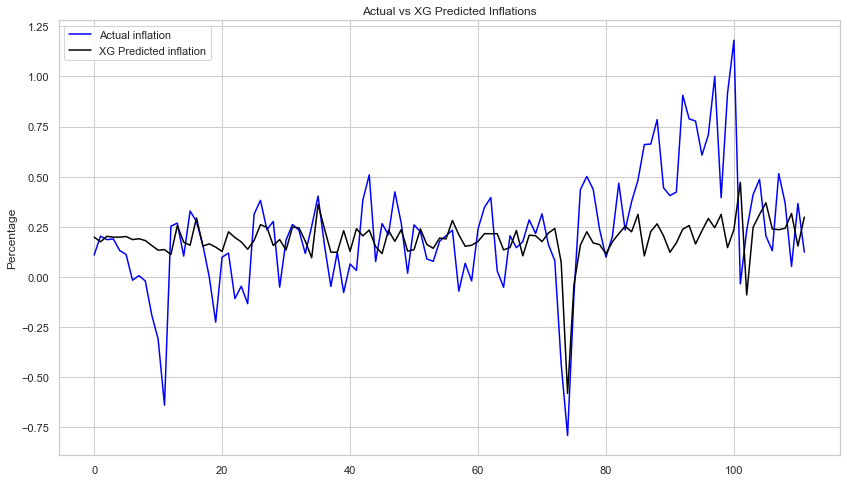

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

#Show RMSE, Correlation and R^2

mse_regression = mean_squared_error(y_test, y_pred)
rmse_regression =  math.sqrt(mse_regression)
print("Mean Squared Error:", mse_regression)
print("Root Mean Squared Error:", rmse_regression)  #RMSE


plt.plot(result['Actual inflation'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['XG Predicted inflation'], linestyle='-', color='black', label='XG Predicted inflation')

r_squared_xg = r2_score(result['Actual inflation'], result['XG Predicted inflation'])
print("R-squared:", r_squared_xg)  #R^2
print(result.corr())   #Correlation

plt.ylabel('Percentage')
plt.title('Actual vs XG Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

# XG Boost Model (Exclude Post-Pandemic Period)

In [24]:
#Perform rolling window prediction
#Rolling window = 1
start=time.time()    

n_train = 233

n_records = 333

y_test_list = []
    
y_pred_list = []

j = 0


pipeline_final = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBRegressor())
])

# Best parameters
best_params = {'pca__n_components': 0.95, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

# Set the best parameters in the pipeline
pipeline_final.set_params(**best_params)

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1

    
end=time.time()

print("Running Time:", end - start)

Running Time: 21.458703994750977


In [25]:
pd.options.display.max_rows=300
result2 = pd.DataFrame({'Actual inflation': y_test_list, 'XG Predicted inflation': y_pred_list}, columns=['Actual inflation', 'XG Predicted inflation'])
result2


,Actual inflation,XG Predicted inflation
0,0.067498,0.218639
1,0.184614,0.138795
2,0.023768,0.226489
3,0.272049,0.170833
4,0.213517,0.257605
5,0.209128,0.208589
6,0.165941,0.205663
7,-0.207032,0.195181
8,-0.082670,0.190524
9,0.028877,0.209677


Mean Squared Error: 0.004681782917962621
Root Mean Squared Error: 0.06842355528590005
R-squared: 0.05241251743613162
                        Actual inflation  XG Predicted inflation
Actual inflation                1.000000                0.413043
XG Predicted inflation          0.413043                1.000000


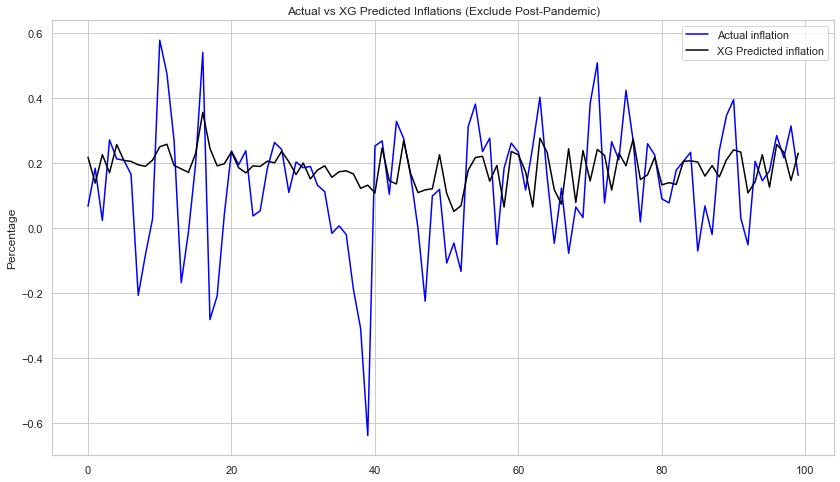

In [26]:
#Show RMSE, Correlation and R^2

mse_regression = mean_squared_error(y_test, y_pred)
rmse_regression =  math.sqrt(mse_regression)
print("Mean Squared Error:", mse_regression)
print("Root Mean Squared Error:", rmse_regression)  #RMSE


plt.plot(result2['Actual inflation'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result2['XG Predicted inflation'], linestyle='-', color='black', label='XG Predicted inflation')

r_squared_xg = r2_score(result2['Actual inflation'], result2['XG Predicted inflation'])
print("R-squared:", r_squared_xg)  #R^2
print(result.corr())   #Correlation

plt.ylabel('Percentage')
plt.title('Actual vs XG Predicted Inflations (Exclude Post-Pandemic)')
plt.legend()
plt.grid(True)
plt.show()